In [1]:
import numpy as np

AttributeError: module 'matplotlib.pyplot' has no attribute 'm'

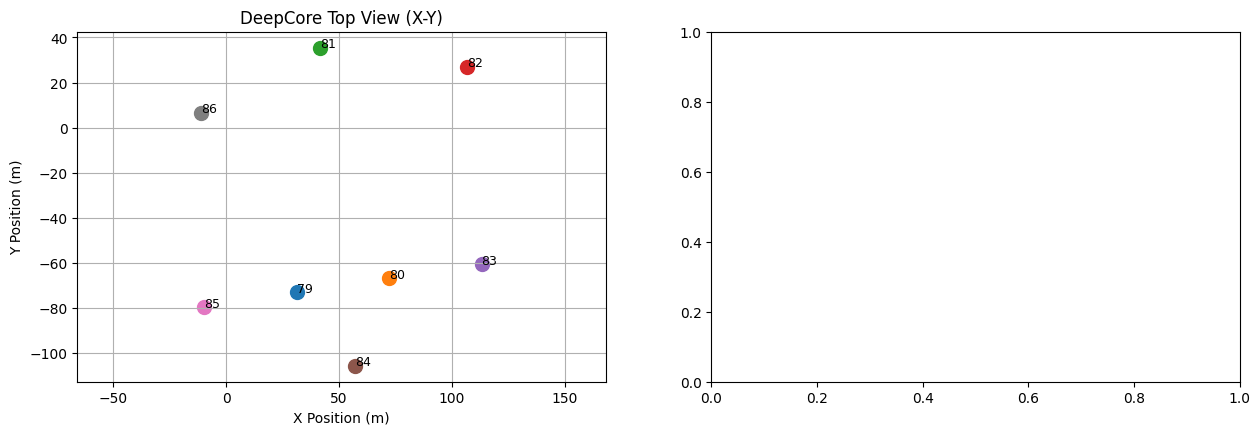

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to parse the IceCube geometry file
def parse_icecube_geo(file_path):
    modules = []
    with open(file_path, 'r') as f:
        in_modules_section = False
        for line in f:
            line = line.strip()
            if line == "### Modules ###":
                in_modules_section = True
                continue
            
            if in_modules_section and line:
                parts = line.split('\t')
                if len(parts) >= 5:
                    modules.append({
                        'x': float(parts[0]),
                        'y': float(parts[1]),
                        'z': float(parts[2]),
                        'string': int(parts[3]),
                        'dom': int(parts[4])
                    })
    return modules

# Load the data
modules = parse_icecube_geo('../resources/geofiles/icecube.geo')  # Replace with your file path

# Extract DeepCore strings (79-86)
deepcore_strings = range(79, 87)  # 79 through 86
deepcore_modules = [m for m in modules if m['string'] in deepcore_strings]

# Create different plots
plt.figure(figsize=(15, 10))

# 1. Top view (X-Y plane)
plt.subplot(221)
for string_id in deepcore_strings:
    string_modules = [m for m in deepcore_modules if m['string'] == string_id]
    x = string_modules[0]['x']  # All DOMs in a string have the same x,y
    y = string_modules[0]['y']
    plt.scatter(x, y, s=100, label=f'String {string_id}')
    plt.text(x, y, str(string_id), fontsize=9)

plt.title('DeepCore Top View (X-Y)')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.grid(True)
plt.axis('equal')

# 2. Side view (X-Z plane)
plt.subplot(222)
colors = plt.m.tab10(np.linspace(0, 1, len(deepcore_strings)))
for i, string_id in enumerate(deepcore_strings):
    string_modules = [m for m in deepcore_modules if m['string'] == string_id]
    x = [m['x'] for m in string_modules]
    z = [m['z'] for m in string_modules]
    plt.scatter(x, z, color=colors[i], s=10, label=f'String {string_id}')

plt.title('DeepCore Side View (X-Z)')
plt.xlabel('X Position (m)')
plt.ylabel('Z Position (m)')
plt.grid(True)
plt.legend(loc='upper right')

# 3. Another side view (Y-Z plane)
plt.subplot(223)
for i, string_id in enumerate(deepcore_strings):
    string_modules = [m for m in deepcore_modules if m['string'] == string_id]
    y = [m['y'] for m in string_modules]
    z = [m['z'] for m in string_modules]
    plt.scatter(y, z, color=colors[i], s=10, label=f'String {string_id}')

plt.title('DeepCore Side View (Y-Z)')
plt.xlabel('Y Position (m)')
plt.ylabel('Z Position (m)')
plt.grid(True)

# 4. 3D view of the detector
ax = plt.subplot(224, projection='3d')
for i, string_id in enumerate(deepcore_strings):
    string_modules = [m for m in deepcore_modules if m['string'] == string_id]
    x = [m['x'] for m in string_modules]
    y = [m['y'] for m in string_modules]
    z = [m['z'] for m in string_modules]
    ax.scatter(x, y, z, color=colors[i], s=5, label=f'String {string_id}')
    
    # Plot a line connecting all DOMs in the string
    ax.plot(x, y, z, color=colors[i], alpha=0.5)

ax.set_title('DeepCore 3D View')
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_zlabel('Z Position (m)')
ax.view_init(elev=20, azim=30)  # Set initial viewing angle

plt.tight_layout()
plt.savefig('icecube_deepcore_visualization.png', dpi=300)
plt.show()

# Display basic statistics
print(f"Total DeepCore DOMs: {len(deepcore_modules)}")
for string_id in deepcore_strings:
    string_modules = [m for m in deepcore_modules if m['string'] == string_id]
    z_min = min(m['z'] for m in string_modules)
    z_max = max(m['z'] for m in string_modules)
    print(f"String {string_id}: {len(string_modules)} DOMs, depth range: {z_min:.1f} to {z_max:.1f} m")

DeepCore modules below -2000m: 400
Z range: -2453.48 to -2104.48 m
Cylinder radius: 100.00 m
Cylinder center: (50.24, -39.47)


/tmp/ipykernel_2509492/538549705.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


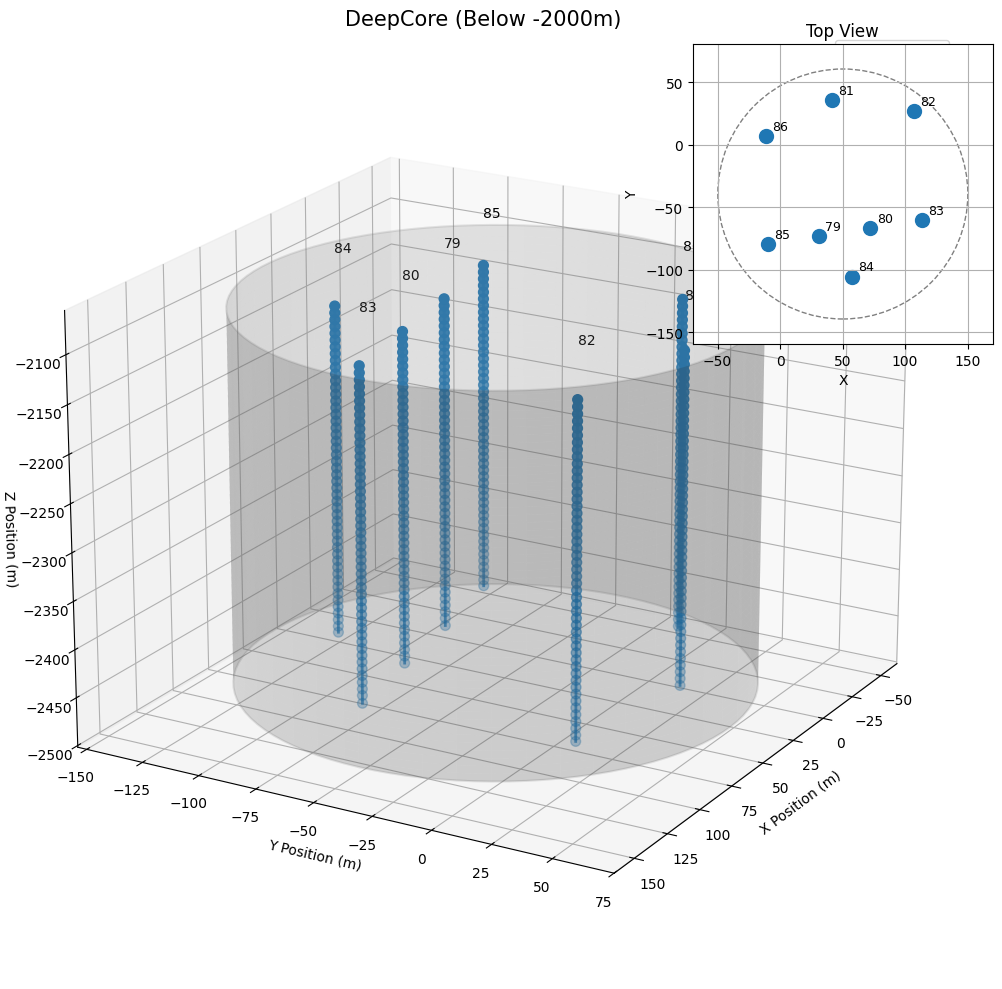

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
import matplotlib.colors as mcolors


def plot_cylinder(ax, center, radius, height, color='gray', alpha=0.2):
    z = np.linspace(height[0], height[1], 100)
    theta = np.linspace(0, 2*np.pi, 100)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius * np.cos(theta_grid) + center[0]
    y_grid = radius * np.sin(theta_grid) + center[1]
    
    ax.plot_surface(x_grid, y_grid, z_grid, color=color, alpha=alpha)
    
    for h in height:
        x = radius * np.cos(theta) + center[0]
        y = radius * np.sin(theta) + center[1]
        z = np.ones_like(theta) * h
        ax.plot(x, y, z, color=color, alpha=alpha)

deepcore_strings = range(79, 87)  # 79 through 86

deepcore_modules = [m for m in modules if m['string'] in deepcore_strings and m['z'] < -2000]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab10(np.linspace(0, 1, len(deepcore_strings)))
colors = plt.cm.tab10(np.linspace(0, 0.01, len(deepcore_strings)))
x_vals = [m['x'] for m in deepcore_modules]
y_vals = [m['y'] for m in deepcore_modules]
z_vals = [m['z'] for m in deepcore_modules]

center_x = np.mean(x_vals)
center_y = np.mean(y_vals)
min_z = min(z_vals)
max_z = max(z_vals)

distances = [np.sqrt((m['x'] - center_x)**2 + (m['y'] - center_y)**2) for m in deepcore_modules]
radius = 100

for i, string_id in enumerate(deepcore_strings):
    string_modules = [m for m in deepcore_modules if m['string'] == string_id]
    
    if not string_modules:
        continue  # Skip if no modules in this string after filtering
    
    x = [m['x'] for m in string_modules]
    y = [m['y'] for m in string_modules]
    z = [m['z'] for m in string_modules]
    
    ax.scatter(x, y, z, color=colors[i], s=50, label=f'String {string_id}')
    
    ax.plot(x, y, z, color=colors[i], alpha=0.7, linewidth=2)
    
    ax.text(x[0], y[0], max_z + 50, f'{string_id}', fontsize=10)

plot_cylinder(ax, [center_x, center_y], radius, [min_z - 20, max_z + 20])

ax_inset = fig.add_axes([0.65, 0.65, 0.3, 0.3])
ax_inset.set_aspect('equal')
ax_inset.grid(True)

for i, string_id in enumerate(deepcore_strings):
    string_modules = [m for m in deepcore_modules if m['string'] == string_id]
    if not string_modules:
        continue
    x = string_modules[0]['x']  # All DOMs in a string have the same x,y
    y = string_modules[0]['y']
    ax_inset.scatter(x, y, color=colors[i], s=100)
    ax_inset.text(x+5, y+5, f'{string_id}', fontsize=9)

circle = Circle((center_x, center_y), radius, fill=False, color='gray', linestyle='--')
ax_inset.add_patch(circle)
ax_inset.set_title('Top View')
ax_inset.set_xlabel('X')
ax_inset.set_ylabel('Y')

limit = radius * 1.2
ax_inset.set_xlim(center_x - limit, center_x + limit)
ax_inset.set_ylim(center_y - limit, center_y + limit)

ax.set_title('DeepCore Cylinder', fontsize=15)
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_zlabel('Z Position (m)')
ax.legend(loc='upper right')


ax.view_init(elev=20, azim=30)

print(f"DeepCore modules below -2000m: {len(deepcore_modules)}")
print(f"Z range: {min_z:.2f} to {max_z:.2f} m")
print(f"Cylinder radius: {radius:.2f} m")
print(f"Cylinder center: ({center_x:.2f}, {center_y:.2f})")

plt.tight_layout()
plt.show()

In [10]:
(-2453.48 - - -  -2104.48)

-349.0

In [11]:
[5.87082946, -2.51860853, -1971.9757655]


[5.87082946, -2.51860853, -1971.9757655]

In [13]:
# DeepCore values (actual positions in detector where we want particles)
cylinder_radius = 100.00  # meters
cylinder_center_x = 50.24
cylinder_center_y = -39.47
z_min = -2453.48
z_max = -2104.48

# Calculate cylinder height
cylinder_height = z_max - z_min  # 349.00 meters

# Calculate cylinder center z (midpoint of min and max z)
cylinder_center_z = (z_min + z_max) / 2  # -2279.98 meters

# Offset to be applied AFTER injection
offset_x = 5.87082946
offset_y = -2.51860853
offset_z = -1971.9757655

# Work BACKWARD to get the injection cylinder parameters
# We need to SUBTRACT the offset to get the pre-offset coordinates
cylinder_center_x_pre_offset = cylinder_center_x - offset_x  # 44.37 meters
cylinder_center_y_pre_offset = cylinder_center_y - offset_y  # -36.95 meters
cylinder_center_z_pre_offset = cylinder_center_z - offset_z  # -308.00 meters

# Final values for your function
print(f"cylinder_radius = {cylinder_radius:.2f},  # meters")
print(f"cylinder_height = {cylinder_height:.2f},  # meters")
print(f"cylinder_center = ({cylinder_center_x_pre_offset:.2f}, {cylinder_center_y_pre_offset:.2f}, {cylinder_center_z_pre_offset:.2f}),  # meters")

cylinder_radius = 100.00,  # meters
cylinder_height = 349.00,  # meters
cylinder_center = (44.37, -36.95, -307.00),  # meters
